- 시각화 프로젝트
    - 출연자와 감독의 영향력에 따른 분석 => 추이 
    - 국가별 가입비에 따른 가입자 수

1) 출연자와 감독의 영향력에 따른 분석

- IMDb (Internet Movie Database) 
- TMDb (The Movie Database)

In [2]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] Data 준비
file1 = r"C:\Hwan\Pandas_ex\시각화 project\titles.csv"
file2 = r"C:\Hwan\Pandas_ex\시각화 project\credits.csv"

In [4]:
# 테이블 합치기 
titleDF = pd.read_csv(file1)
creditDF = pd.read_csv(file2)

In [5]:
# 확인
print(titleDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [6]:
print(creditDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None


In [7]:
# 결측치 확인
titleDF.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [8]:
# 중복값 확인
titleDF.duplicated().sum()

0

In [9]:
# 필요없는 칼럼 제거
titleDF.columns
titleDF.drop(["description", "release_year", "age_certification", "runtime", "seasons", "imdb_id"], axis = 1, inplace = True)

In [10]:
titleDF.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,6.510861,2.343938e+04,22.637925,6.829175
std,1.163826,9.582047e+04,81.680263,1.170391
min,1.500000,5.000000e+00,0.009442,0.500000
25%,5.800000,5.167500e+02,2.728500,6.100000
50%,6.600000,2.233500e+03,6.821000,6.900000
75%,7.300000,9.494000e+03,16.590000,7.537500
max,9.600000,2.294231e+06,2274.044000,10.000000


In [11]:
titleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   genres                5850 non-null   object 
 4   production_countries  5850 non-null   object 
 5   imdb_score            5368 non-null   float64
 6   imdb_votes            5352 non-null   float64
 7   tmdb_popularity       5759 non-null   float64
 8   tmdb_score            5539 non-null   float64
dtypes: float64(4), object(5)
memory usage: 411.5+ KB


##### 평균치 vs 이상치
- 평균값 : 이상치에 매우 민감, 데이터에 극단적인 값이 있으면 평균이 그 값에 영향을 크게 받음 -> 전체 데이터 왜곡 가능성 ↑
- 중앙값 : 데이터의 중간값이므로, 이상치의 영향을 받음 => 주관적인 평가가 포함된 데이터에서 사용 

##### imdb_score, mdb_votes, tmdb_popularity, tmdb_score 평가 데이터, 투표 데이터, 인기도 데이터, 평점 데이터 모두 주관적
==> 이상치의 영향을 받을 가능성 ↑
==> 결측치를 모두 중앙값으로 대체

In [12]:
# 결측치 => 중앙값으로 채우기
titleDF['imdb_score'].fillna(titleDF['imdb_score'].median(), inplace=True)
titleDF['imdb_votes'].fillna(titleDF['imdb_votes'].median(), inplace=True)
titleDF['tmdb_popularity'].fillna(titleDF['tmdb_popularity'].median(), inplace=True)
titleDF['tmdb_score'].fillna(titleDF['tmdb_score'].median(), inplace=True)

C:\Users\hwans\AppData\Local\Temp\ipykernel_14220\3623337720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titleDF['imdb_score'].fillna(titleDF['imdb_score'].median(), inplace=True)
C:\Users\hwans\AppData\Local\Temp\ipykernel_14220\3623337720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [13]:
titleDF.isna().sum()

id                      0
title                   1
type                    0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [14]:
# title 칼럼 결측치 찾은 후 제거
titleDF[titleDF['title'].isna()]
titleDF = titleDF.drop(index = 1704)

In [15]:
titleDF.isna().sum()

id                      0
title                   0
type                    0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [16]:
# credit 파일 결측치 확인 후 제거
creditDF.info()
creditDF.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [17]:
# 중복값 확인 및 제거
creditDF.duplicated().sum()

0

In [18]:
# 필요없는 칼럼 제거
creditDF = creditDF.drop(["character"], axis = 1)

In [19]:
creditDF

,person_id,id,name,role
0,3748,tm84618,Robert De Niro,ACTOR
1,14658,tm84618,Jodie Foster,ACTOR
2,7064,tm84618,Albert Brooks,ACTOR
3,3739,tm84618,Harvey Keitel,ACTOR
4,48933,tm84618,Cybill Shepherd,ACTOR
...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,ACTOR
77798,373198,tm1059008,Inés Prieto,ACTOR
77799,378132,tm1059008,Isabel Gaona,ACTOR


In [20]:
# 2개의 DataFrame 합치기
TotlaDF = pd.merge(creditDF, titleDF, left_on = "id", right_on = "id")
TotlaDF

,person_id,id,name,role,title,type,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
1,14658,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,7064,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
3,3739,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
4,48933,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
...,...,...,...,...,...,...,...,...,...,...,...,...
77795,736339,tm1059008,Adelaida Buscato,ACTOR,Lokillo,MOVIE,['comedy'],['CO'],3.8,68.0,26.005,6.300
77796,399499,tm1059008,Luz Stella Luengas,ACTOR,Lokillo,MOVIE,['comedy'],['CO'],3.8,68.0,26.005,6.300
77797,373198,tm1059008,Inés Prieto,ACTOR,Lokillo,MOVIE,['comedy'],['CO'],3.8,68.0,26.005,6.300
77798,378132,tm1059008,Isabel Gaona,ACTOR,Lokillo,MOVIE,['comedy'],['CO'],3.8,68.0,26.005,6.300


- [분석]

In [29]:
# 출연배우별 참여한 콘텐츠의 수와 인기도 분석
# 주요 배우와 감독별로 참여한 콘텐츠 수
role_counts = TotlaDF.groupby(['name', 'role']).size().reset_index(name='count')

# 주요 배우와 감독별로 TMDB 인기 점수 평균
role_popularity = TotlaDF.groupby(['name', 'role'])['tmdb_popularity'].mean().reset_index(name='avg_tmdb_popularity')

# 주요 배우와 감독별로 IMDb 평점 평균
role_imdb_score = TotlaDF.groupby(['name', 'role'])['imdb_score'].mean().reset_index(name='avg_imdb_score')

# 데이터 병합
role_analysis = pd.merge(role_counts, role_popularity, on=['name', 'role'])
role_analysis = pd.merge(role_analysis, role_imdb_score, on=['name', 'role'])

# 결과 확인
role_analysis_df = pd.DataFrame(role_analysis)
print(role_analysis_df)

                      name      role  count  avg_tmdb_popularity  \
0           Michael Hayden     ACTOR      1                6.159   
1             'Jeeva' Ravi     ACTOR      1                2.540   
2      'Weird Al' Yankovic     ACTOR      2               10.963   
3                21 Savage     ACTOR      1               12.640   
4                     2Mex     ACTOR      1                1.859   
...                    ...       ...    ...                  ...   
54746                   장성  DIRECTOR      2                0.641   
54747                  정지환     ACTOR      1               50.095   
54748                  주둥닝  DIRECTOR      1               29.769   
54749                   지뢰  DIRECTOR      1                8.369   
54750                   탕빈  DIRECTOR      1               42.708   

       avg_imdb_score  
0                 6.9  
1                 7.6  
2                 6.5  
3                 4.3  
4                 6.3  
...               ...  
54746          

In [32]:
role_counts

,name,role,count
0,Michael Hayden,ACTOR,1
1,'Jeeva' Ravi,ACTOR,1
2,'Weird Al' Yankovic,ACTOR,2
3,21 Savage,ACTOR,1
4,2Mex,ACTOR,1
...,...,...,...
54746,장성,DIRECTOR,2
54747,정지환,ACTOR,1
54748,주둥닝,DIRECTOR,1
54749,지뢰,DIRECTOR,1


In [30]:
# 가장 영향력 있는 배우 식별 (TMDB 인기 점수를 기준으로 상위 10명)
top_actors = role_analysis_df[role_analysis_df['role'] == 'ACTOR'].sort_values(by='avg_tmdb_popularity', ascending=False).head(10)

# 가장 영향력 있는 감독 식별 (TMDB 인기 점수를 기준으로 상위 10명)
top_directors = role_analysis_df[role_analysis_df['role'] == 'DIRECTOR'].sort_values(by='avg_tmdb_popularity', ascending=False).head(10)

# 결과 출력
print("Top Actors by TMDB Popularity:")
print(top_actors)
print("\nTop Directors by TMDB Popularity:")
print(top_directors)

Top Actors by TMDB Popularity:
                       name   role  count  avg_tmdb_popularity  avg_imdb_score
45839              Sean Lin  ACTOR      1             2274.044             6.2
41405                    RQ  ACTOR      1             2274.044             6.2
41340          Queenie Chen  ACTOR      1             2274.044             6.2
47269        Sin-Ting Huang  ACTOR      1             2274.044             6.2
19827        Hsuan-yen Tsai  ACTOR      1             2274.044             6.2
8964         Charlie Heaton  ACTOR      1             2226.231             8.7
21668  Jamie Campbell Bower  ACTOR      1             2226.231             8.7
41197        Priah Ferguson  ACTOR      1             2226.231             8.7
54282     Zaris-Angel Hator  ACTOR      1             1723.363             7.1
39945         Paul Chowdhry  ACTOR      1             1723.363             7.1

Top Directors by TMDB Popularity:
                      name      role  count  avg_tmdb_popularity 

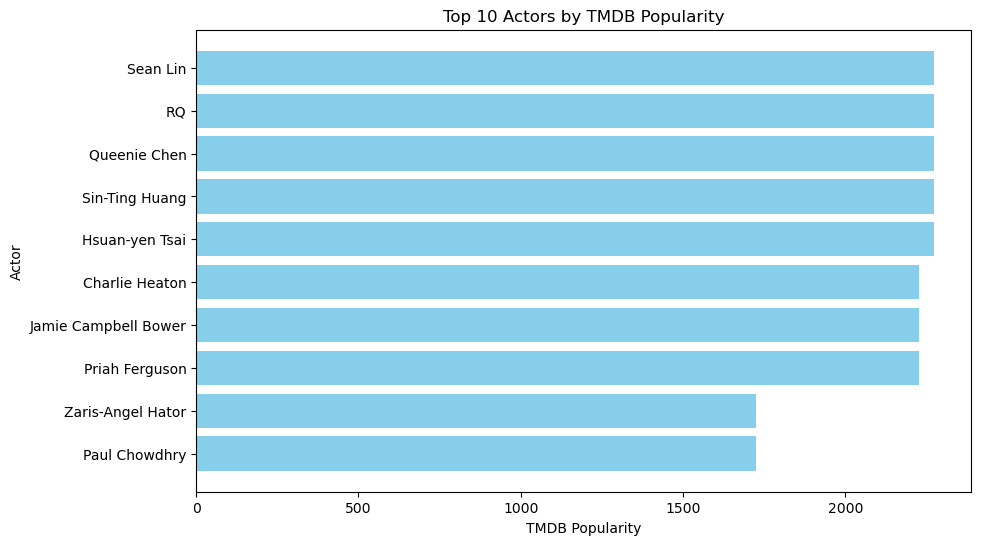

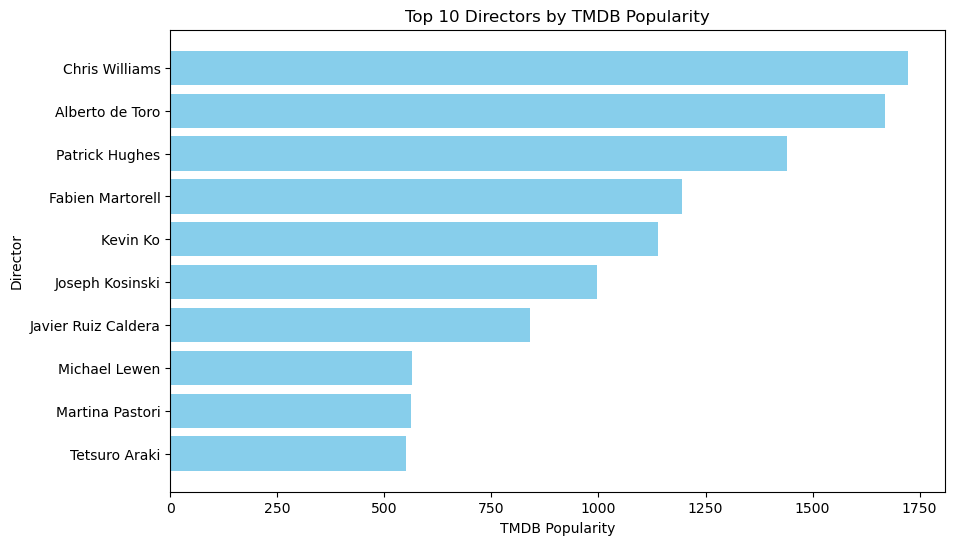

In [31]:
def plot_bar_graph(data, title, x_label, y_label, column_name):
    plt.figure(figsize=(10, 6))
    plt.barh(data['name'], data[column_name], color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.gca().invert_yaxis() # 가장 높은 값이 위에 오도록 설정
    plt.show()

# 가장 영향력 있는 배우 시각화 (TMDB 인기 점수 기준)
plot_bar_graph(top_actors, 'Top 10 Actors by TMDB Popularity', 'TMDB Popularity', 'Actor', 'avg_tmdb_popularity')

# 가장 영향력 있는 감독 시각화 (TMDB 인기 점수 기준)
plot_bar_graph(top_directors, 'Top 10 Directors by TMDB Popularity', 'TMDB Popularity', 'Director', 'avg_tmdb_popularity')